<a href="https://colab.research.google.com/github/kumar-devesh/DETR/blob/master/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import itertools
import PIL
from tqdm import tqdm
from shutil import copyfile
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision.datasets import VOCDetection

In [ ]:
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
!pip install xmltodict
!pip install dicttoxml 

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=7ac2edaefea5e71f17151a4fc8f0f94ef238ce3979a3e6c3f11967112684e5e1
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml


In [ ]:
import xmltodict
from dicttoxml import dicttoxml

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
batch_size = 1
dir_path = "/content/drive/MyDrive/Colab Notebooks/detr"

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/detr

/content/drive/MyDrive/Colab Notebooks/detr


In [ ]:
mkdir -p dataset

In [ ]:
os.listdir("./dataset")

['VOCtrainval_11-May-2012.tar', 'VOCdevkit']

In [ ]:
if len(os.listdir("./dataset")) != 0:
  train_data = VOCDetection(root = os.path.join(dir_path, 'dataset'), image_set = 'train', download = False, transform = transforms.ToTensor())
else:
  train_data = VOCDetection(root = os.path.join(dir_path, 'dataset'), image_set = 'train', download = True, transform = transforms.ToTensor())

### dataset visualization


In [ ]:
train_loader = DataLoader(train_data, batch_size, shuffle=True, num_workers=2)

In [ ]:
img, labels = next(iter(train_loader))

In [ ]:
def plotImage(image):
  image = np.array(image)
  plt.imshow(np.transpose(image,(1,2,0)))

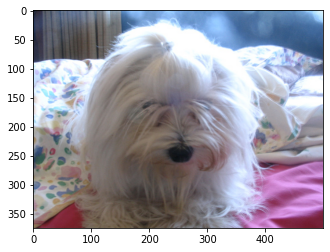

In [ ]:
plotImage(img[0])

### dataset analysis

In [ ]:
img_dir_raw = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/VOCdevkit/VOC2012/JPEGImages'
annotation_dir_raw = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/VOCdevkit/VOC2012/Annotations'

In [ ]:
img_raw_list = os.listdir(img_dir_raw)
annotation_raw_list = os.listdir(annotation_dir_raw)

In [ ]:
img_raw_list.sort(reverse = True)
annotation_raw_list.sort(reverse = True)

In [ ]:
print(img_raw_list[0:8])
print(annotation_raw_list[0:8])

['2012_004331.jpg', '2012_004330.jpg', '2012_004329.jpg', '2012_004328.jpg', '2012_004326.jpg', '2012_004319.jpg', '2012_004317.jpg', '2012_004315.jpg']
['2012_004331.xml', '2012_004330.xml', '2012_004329.xml', '2012_004328.xml', '2012_004326.xml', '2012_004319.xml', '2012_004317.xml', '2012_004315.xml']


In [ ]:
print(len(img_raw_list))
print(len(annotation_raw_list))

17125
17125


In [ ]:
def plotGrid(train_images):
  images = train_images
  img_grid = torchvision.utils.make_grid(images, nrow=4)
  img_grig = np.array(img_grid)
  img_grid = np.transpose(img_grid,(1,2,0))
  plt.imshow(img_grid)

In [ ]:
def convert_xml_to_dict(path):
  """ converts xml file to a dictionary """
  fileptr = open(path,"r")
 
  xml = fileptr.read()
  
  #change xml format to ordered dict
  xml_to_dict = xmltodict.parse(xml)
  return xml_to_dict

In [ ]:
path = './dataset/VOCdevkit/VOC2012/Annotations/2012_004331.xml'
dct = convert_xml_to_dict(path)
print(dct)

OrderedDict([('annotation', OrderedDict([('filename', '2012_004331.jpg'), ('folder', 'VOC2012'), ('object', OrderedDict([('name', 'person'), ('actions', OrderedDict([('jumping', '1'), ('other', '0'), ('phoning', '0'), ('playinginstrument', '0'), ('reading', '0'), ('ridingbike', '0'), ('ridinghorse', '0'), ('running', '0'), ('takingphoto', '0'), ('usingcomputer', '0'), ('walking', '0')])), ('bndbox', OrderedDict([('xmax', '208'), ('xmin', '102'), ('ymax', '230'), ('ymin', '25')])), ('difficult', '0'), ('pose', 'Unspecified'), ('point', OrderedDict([('x', '155'), ('y', '119')]))])), ('segmented', '0'), ('size', OrderedDict([('depth', '3'), ('height', '375'), ('width', '500')])), ('source', OrderedDict([('annotation', 'PASCAL VOC2012'), ('database', 'The VOC2012 Database'), ('image', 'flickr')]))]))])


In [ ]:
def convert_dict_to_xml(inp_dict):
  """ convets dictionary to xml """
  xml = dicttoxml(inp_dict)
  print(xml)
  return xml

In [ ]:
xml = convert_dict_to_xml(dct)
print(xml)

b'<?xml version="1.0" encoding="UTF-8" ?><root><annotation type="dict"><filename type="str">2012_004331.jpg</filename><folder type="str">VOC2012</folder><object type="dict"><name type="str">person</name><actions type="dict"><jumping type="str">1</jumping><other type="str">0</other><phoning type="str">0</phoning><playinginstrument type="str">0</playinginstrument><reading type="str">0</reading><ridingbike type="str">0</ridingbike><ridinghorse type="str">0</ridinghorse><running type="str">0</running><takingphoto type="str">0</takingphoto><usingcomputer type="str">0</usingcomputer><walking type="str">0</walking></actions><bndbox type="dict"><xmax type="str">208</xmax><xmin type="str">102</xmin><ymax type="str">230</ymax><ymin type="str">25</ymin></bndbox><difficult type="str">0</difficult><pose type="str">Unspecified</pose><point type="dict"><x type="str">155</x><y type="str">119</y></point></object><segmented type="str">0</segmented><size type="dict"><depth type="str">3</depth><height typ

In [ ]:
def get_data():
  images = []
  annotations = []
  for image_file in img_raw_list[0:8]:
    img_path = os.path.join(img_dir_raw, image_file)
    image = np.array(Image.open(img_path))
    images.append(image)
  for annotation_file in annotation_raw_list[0:8]:
    annotation_path = os.path.join(annotation_dir_raw, annotation_file)
    annotation = convert_xml_to_dict(annotation_path)
    annotations.append(annotation)
  return (images, annotations)

In [ ]:
images, annotations = get_data()

In [ ]:
print(annotations[0])

OrderedDict([('annotation', OrderedDict([('filename', '2012_004331.jpg'), ('folder', 'VOC2012'), ('object', OrderedDict([('name', 'person'), ('actions', OrderedDict([('jumping', '1'), ('other', '0'), ('phoning', '0'), ('playinginstrument', '0'), ('reading', '0'), ('ridingbike', '0'), ('ridinghorse', '0'), ('running', '0'), ('takingphoto', '0'), ('usingcomputer', '0'), ('walking', '0')])), ('bndbox', OrderedDict([('xmax', '208'), ('xmin', '102'), ('ymax', '230'), ('ymin', '25')])), ('difficult', '0'), ('pose', 'Unspecified'), ('point', OrderedDict([('x', '155'), ('y', '119')]))])), ('segmented', '0'), ('size', OrderedDict([('depth', '3'), ('height', '375'), ('width', '500')])), ('source', OrderedDict([('annotation', 'PASCAL VOC2012'), ('database', 'The VOC2012 Database'), ('image', 'flickr')]))]))])


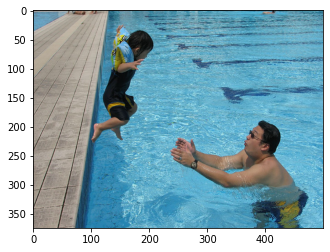

In [ ]:
plt.imshow(images[0])

### preprocessing


In [ ]:
#create 3 directories for images and annotations train,test,val

In [ ]:
mkdir -p dataset/preprocessed/images/train

In [ ]:
mkdir -p dataset/preprocessed/images/test

In [ ]:
mkdir -p dataset/preprocessed/images/val

In [ ]:
mkdir -p dataset/preprocessed/annotations/train

In [ ]:
mkdir -p dataset/preprocessed/annotations/test

In [ ]:
mkdir -p dataset/preprocessed/annotations/val

use a train val split

In [ ]:
split_path = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/VOCdevkit/VOC2012/ImageSets/Main'

In [ ]:
os.listdir(split_path)

In [ ]:
train_file_path = os.path.join(split_path, 'train.txt')
val_file_path = os.path.join(split_path, 'val.txt')

In [ ]:
train_list = []

In [ ]:
with open(train_file_path, mode = 'r') as f:
  for line in f:
    line = line.rstrip()
    train_list.append(line)

In [ ]:
print(len(train_list))

5717


In [ ]:
print(train_list)

['2008_000008', '2008_000015', '2008_000019', '2008_000023', '2008_000028', '2008_000033', '2008_000036', '2008_000037', '2008_000041', '2008_000045', '2008_000053', '2008_000060', '2008_000066', '2008_000070', '2008_000074', '2008_000085', '2008_000089', '2008_000093', '2008_000095', '2008_000096', '2008_000097', '2008_000099', '2008_000103', '2008_000105', '2008_000109', '2008_000112', '2008_000128', '2008_000131', '2008_000132', '2008_000141', '2008_000142', '2008_000143', '2008_000144', '2008_000148', '2008_000151', '2008_000154', '2008_000162', '2008_000176', '2008_000181', '2008_000185', '2008_000187', '2008_000188', '2008_000189', '2008_000191', '2008_000192', '2008_000193', '2008_000196', '2008_000197', '2008_000199', '2008_000202', '2008_000207', '2008_000217', '2008_000226', '2008_000227', '2008_000235', '2008_000236', '2008_000237', '2008_000238', '2008_000252', '2008_000255', '2008_000259', '2008_000260', '2008_000262', '2008_000266', '2008_000273', '2008_000275', '2008_000

In [ ]:
val_list = []

In [ ]:
with open(val_file_path, mode = 'r') as f:
  for line in f:
    line = line.rstrip()
    val_list.append(line)

In [ ]:
print(len(val_list))

5823


In [ ]:
print(val_list)

['2008_000002', '2008_000003', '2008_000007', '2008_000009', '2008_000016', '2008_000021', '2008_000026', '2008_000027', '2008_000032', '2008_000034', '2008_000042', '2008_000043', '2008_000050', '2008_000051', '2008_000052', '2008_000054', '2008_000056', '2008_000059', '2008_000062', '2008_000064', '2008_000067', '2008_000073', '2008_000075', '2008_000076', '2008_000078', '2008_000080', '2008_000082', '2008_000084', '2008_000090', '2008_000107', '2008_000115', '2008_000116', '2008_000119', '2008_000120', '2008_000123', '2008_000133', '2008_000134', '2008_000138', '2008_000140', '2008_000145', '2008_000149', '2008_000163', '2008_000174', '2008_000177', '2008_000182', '2008_000183', '2008_000190', '2008_000194', '2008_000195', '2008_000203', '2008_000204', '2008_000213', '2008_000215', '2008_000219', '2008_000222', '2008_000223', '2008_000233', '2008_000234', '2008_000239', '2008_000243', '2008_000244', '2008_000246', '2008_000251', '2008_000253', '2008_000254', '2008_000257', '2008_000

### mov the files into corresponding folders

In [ ]:
img_dir_raw = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/VOCdevkit/VOC2012/JPEGImages'
annotation_dir_raw = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/VOCdevkit/VOC2012/Annotations'

In [ ]:
img_dir_preprocessed = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/preprocessed/images'
annotation_dir_preprocessed = '/content/drive/MyDrive/Colab Notebooks/detr/dataset/preprocessed/annotations'

In [ ]:
train_list.sort(reverse = True)
val_list.sort(reverse = True)

In [ ]:
print(len(train_list))
print(len(val_list))

5717
5823


In [ ]:
def copy_to_train():
  for image in train_list:
    img_path_src = os.path.join(img_dir_raw, image)
    img_path_src = img_path_src + '.jpg' #extension
    img_path_dst = os.path.join(img_dir_preprocessed, 'train', image)
    img_path_dst = img_path_dst + '.jpg' #extension
    img = Image.open(img_path_src)
    img = img.save(img_path_dst)

  for annotation in train_list:
    annotation_path_src = os.path.join(annotation_dir_raw, annotation)
    annotation_path_src = annotation_path_src + '.xml' #extension
    annotation_path_dst = os.path.join(annotation_dir_preprocessed, 'train', annotation)
    annotation_path_dst = annotation_path_dst + '.xml' #extension
    copyfile(annotation_path_src, annotation_path_dst)

In [ ]:
def copy_to_val():
  for image in val_list:
    img_path_src = os.path.join(img_dir_raw, image)
    img_path_src = img_path_src + '.jpg' #extension
    img_path_dst = os.path.join(img_dir_preprocessed, 'val', image)
    img_path_dst = img_path_dst + '.jpg' #extension
    img = Image.open(img_path_src)
    img = img.save(img_path_dst)

  for annotation in val_list:
    annotation_path_src = os.path.join(annotation_dir_raw, annotation)
    annotation_path_src = annotation_path_src + '.xml' #extension
    annotation_path_dst = os.path.join(annotation_dir_preprocessed, 'val', annotation)
    annotation_path_dst = annotation_path_dst + '.xml' #extension
    copyfile(annotation_path_src, annotation_path_dst)

In [ ]:
copy_to_val()
copy_to_train()

### val test split